# Exploring Rolling Stone Top 500 Albums 2012

The dataset used here came from [Kaggle](https://www.kaggle.com/datasets) via [data.world](https://data.world/notgibs/rolling-stones-top-500-albums). The analysis performed in this notebook heavily focuses on the Pandas functionality found in [The Pandas Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf). 

If something is used that isn't in the cheatsheet, follow links! They lead to official docs. They're included in lieu of explicit explanation of what different cells are doing, because that's what docs are for! Get the most out of this by digging in, messing around, and breaking stuff.

In [130]:
import pandas as pd

df = pd.read_csv('albumlist.csv')

With our data imported, let's take a cursory [look](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dtypes.html) at what we're dealing with.

## High Level Analysis

In [131]:
df.dtypes

Number       int64
Year         int64
Album       object
Artist      object
Genre       object
Subgenre    object
dtype: object

In [132]:
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


Six columns. We've got:
- *Number*, thenranking of the album
- *Year*, the year the album was released.
- *Album*, the title. (An object, which is Pandas for String)
- *Genre* 
- *Subgenre*

With a quick [summary](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe) of the dataset, we can get a feel for what might be some interesting questions to ask about our data and scheme out our analysis for the rest of the notebook.

In [133]:
df.describe(include='all')

,Number,Year,Album,Artist,Genre,Subgenre
count,500.000000,500.000000,500,500,500,500
unique,NaN,NaN,497,289,63,290
top,NaN,NaN,Greatest Hits,The Rolling Stones,Rock,None
freq,NaN,NaN,3,10,249,29
mean,250.500000,1979.270000,NaN,NaN,NaN,NaN
std,144.481833,12.093701,NaN,NaN,NaN,NaN
min,1.000000,1955.000000,NaN,NaN,NaN,NaN
25%,125.750000,1970.000000,NaN,NaN,NaN,NaN
50%,250.500000,1976.000000,NaN,NaN,NaN,NaN
75%,375.250000,1988.000000,NaN,NaN,NaN,NaN


This small summary says a lot!

*Number* is hard to summarize since it's the ranking of the album, but it will be interesting later!

The min *Year* of this dataset is 1955 and the max is 2011, so we know that this info covers 56 years of albums. The [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) (the 3 rows below *min*) tell us even more. The first (Q1) is 1970, so 1/4 of all these albums came out before then, or within the first 15 years of this time period. The next 25% (Q2) of the data was all from the following 6 years! That tells us that a ton of these top 500 albums came from the 70s, so maybe that'd be a good subset of the data to analyze later. Q3 covers 8 years of data, and then Q4 is the last 23. This shows us another trend: There was a huge dropoff for Rolling Stone adding new albums to their best-of-all-time after 1988. Something else to consider later.

Next, we look *Album* and notice that there are only 497 unique albums in this list of 500 albums. That doesn't seem right... Apparently, the album title that's getting repeated is *Greatest Hits* (*freq* tells us that it was repeated 3 times). We'll come back to that later as well.

*Artist*: We see the Beatles made it on 10 times. Quite a few artists made it on more than once as well, it appears since there are only 289 unique artists out of 500 rows of data.

Finally, *Genre* and *Subgenre*. Rock dominates the genres in the list with more than half the "best" albums being in that category. *Subgenre* will be interesting to look at, since even though the #1 subgenre is `None`, that only happens 29 times, so 461 of these have subgenres listed.

Armed with some paths to head down, let's explore.

## Diving In 

#### Top Albums Over The Years
We noted earlier that the distribution of top albums over the years is pretty interesting. Let's visualize that. To do that, we need `matpolotlib`.

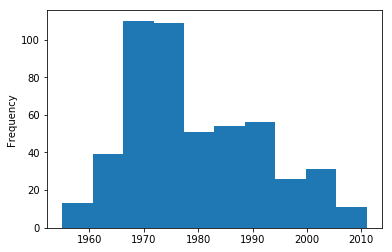

In [303]:
import matplotlib # gets used under the hood
df['Year'].plot.hist()

The histogram above verifies the suspicion that there were lots of top 500 albums in the late 60s and early 70s. Let's peek into a subset of those years.

In [135]:
seventies = df.query('Year > 1964 and Year < 1980') # a little 60s too
len(seventies)

276

This period accounts for 276 out the 500 albums. Let's inspect how many of the top 10 for different time periods occur. We'll use a function since we'll do this a lot.

In [155]:
def top_albums(frame, sort_col='Number'):
    return frame.sort_values(by=sort_col).head(10)

top_albums(df)

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock"
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave"
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock,"Rock & Roll, Pop Rock, Psychedelic Rock, Exper..."


In [156]:
top_albums(seventies)

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
5,6,1971,What's Going On,Marvin Gaye,Funk / Soul,Soul
6,7,1972,Exile on Main St.,The Rolling Stones,Rock,"Blues Rock, Rock & Roll, Classic Rock"
7,8,1979,London Calling,The Clash,Rock,"Punk, New Wave"
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
9,10,1968,"The Beatles (""The White Album"")",The Beatles,Rock,"Rock & Roll, Pop Rock, Psychedelic Rock, Exper..."


Wow. The Top 10 of all time and the top 10 of the seventies are *exactly* the same! I wonder how albums from this century stack up.

In [157]:
nowadays = df.query('Year > 1999')
top_albums(nowadays)

,Number,Year,Album,Artist,Genre,Subgenre
37,38,2001,The Anthology,Muddy Waters,"Folk, World, & Country",Folk
66,67,2000,Kid A,Radiohead,"Electronic, Rock","Alternative Rock, IDM, Experimental"
106,107,2003,Portrait of a Legend 1951-1964,Sam Cooke,"Latin, Funk / Soul","Soul, Rhythm & Blues, Gospel, Cha-Cha"
117,118,2005,Late Registration,Kanye West,Hip Hop,None
150,151,2004,Funeral,Arcade Fire,Rock,Indie Rock
163,164,2002,The Very Best of Linda Ronstadt,Linda Ronstadt,"Rock, Pop","Soft Rock, Pop Rock"
178,179,2001,The Definitive Collection,ABBA,"Electronic, Pop","Europop, Synth-pop, Disco"
198,199,2001,Is This It,The Strokes,Rock,Indie Rock
203,204,2006,Modern Times,Bob Dylan,Rock,"Blues Rock, Folk Rock"
224,225,2004,American Idiot,Green Day,Rock,"Pop Rock, Punk"


The highest ranked album from the 21st century comes in at *37*! We are slacking huh.
There's definitely a ton more to see here, so please, add to the notebook and see what other questions you can ask. For now, we'll move on.

#### The Duplicate Album
The summary earlier told us that there was one album on the list three times: 'Greatest Hits'. Let's take a look at that one.

In [161]:
df.query('Album == "Greatest Hits"')

,Number,Year,Album,Artist,Genre,Subgenre
51,52,1975,Greatest Hits,Al Green,Funk / Soul,Soul
60,61,1970,Greatest Hits,Sly & The Family Stone,Funk / Soul,"Rhythm & Blues, Funk"
135,136,1974,Greatest Hits,Elton John,Rock,Classic Rock


Welp, that was easy. A few artists over the years called their album *Greatest Hits*. We don't need to change this, since now we know that this dataset is unique on Album and Artist.

#### Artists
For starters, let's double check who the top 10 artists are.

In [193]:
df.Artist.value_counts().head(10)

The Rolling Stones    10
Bob Dylan             10
The Beatles           10
Bruce Springsteen      8
The Who                7
Elton John             5
Radiohead              5
David Bowie            5
Led Zeppelin           5
Various Artists        5
Name: Artist, dtype: int64

All of the top 10 most seen artists had quite a few albums in the top 10.

Also --various artists? That's hardly fair. What albums had multiple contributors?

In [194]:
df.query('Artist == "Various Artists"')

,Number,Year,Album,Artist,Genre,Subgenre
121,122,1972,The Harder They Come,Various Artists,"Reggae,�Pop,�Folk, World, & Country,�Stage & S...","Reggae,�Roots Reggae,�Rocksteady,�Contemporary..."
131,132,1977,Saturday Night Fever: The Original Movie Sound...,Various Artists,"Electronic,�Stage & Screen","Soundtrack,�Disco"
195,196,1998,Nuggets: Original Artyfacts From the First Psy...,Various Artists,Rock,"Garage Rock,�Psychedelic Rock"
387,388,1985,The Indestructible Beat of Soweto,Various Artists,"Funk / Soul,�Folk, World, & Country",African
420,421,1990,"The Best of the Girl Groups, Volume 1",Various Artists,"Rock,�Pop","Pop Rock, Vocal"


Given that so many artists appear multiple times, it might be interesting to look at one-hit wonders.

In [300]:
# get a list of artists who only appear in the dataset once
only_once = df.Artist.value_counts()[df.Artist.value_counts() == 1]
# filter df for artists who appear in `only_once` list
one_hit_wonders = df[df.Artist.isin(only_once.index)]
len(one_hit_wonders)

178

178 out of 500 albums are one hit wonders. That's very interesting! It seems like the Top 500 albums are skewed really heavily towards artists who have been on it before.

#### Genres

Finally, before we circle back and ask our own questions, let's look at the genres.

In [302]:
df.Genre.value_counts()

Rock                                                    249
Funk / Soul                                              38
Hip Hop                                                  29
Electronic, Rock                                         19
Rock, Pop                                                18
Rock, Blues                                              16
Folk, World, & Country                                   13
Rock, Folk, World, & Country                              9
Blues                                                     8
Electronic                                                7
Jazz                                                      7
Funk / Soul, Pop                                          6
Reggae                                                    6
Electronic, Pop                                           5
Rock, Funk / Soul                                         5
Funk / Soul, Blues                                        4
Rock, Stage & Screen                    

Hmmm... lots of variation in naming here. Descriptive stats of genres over time like we've done before would be very helpful, so let's try and isolate just the first genre in the lists of genres. We'll have to use [regular expressions](https://www.novixys.com/blog/python-regular-expression-tutorial-part-1/) and the Python [re](https://docs.python.org/3/library/re.html#re.split) module.

In [407]:
import re
def grab_first_in_list(genre):
    # split the strings into lists
    # split happens at a "," a "/", or a " "
    return re.split(r'[,/]', genre)[0]

df['PrimaryGenre'] = df['Genre'].apply(grab_first_in_list) # make a new column
df.head()

,Number,Year,Album,Artist,Genre,Subgenre,PrimaryGenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",Rock
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",Rock
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",Rock
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",Rock
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,Rock


Excellent, PrimaryGenre should be much more manageable to use now.

In [408]:
genres_by_year = df.groupby(['PrimaryGenre', 'Year'])['PrimaryGenre'].count()
df.groupby(['PrimaryGenre', 'Year'])['PrimaryGenre'].count().index

MultiIndex(levels=[['Blues', 'Classical', 'Electronic', 'Folk', 'Funk ', 'Hip Hop', 'Jazz', 'Latin', 'Pop', 'Reggae', 'Rock'], [1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

Now it's possible to examine the incidence of genres over the years.

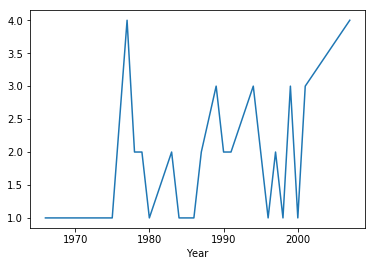

In [409]:
genres_by_year['Electronic'].plot()

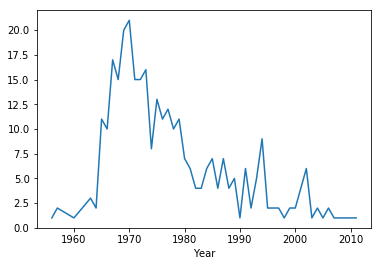

In [410]:
genres_by_year['Rock'].plot()

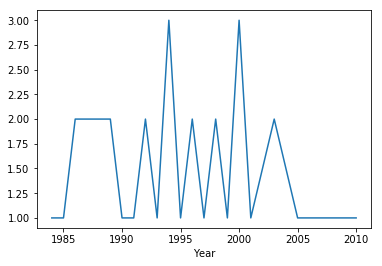

In [411]:
genres_by_year['Hip Hop'].plot()